In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [3]:
data = pd.read_csv("D:\\Prathyu College\\YR 3 (SEM 6)\\Deep Learning\\DL PROJECT\\voice.csv")
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
print("Total number of labels: {}".format(data.shape[0]))
print("Number of male: {}".format(data[data.label == 'male'].shape[0]))
print("Number of female: {}".format(data[data.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [6]:
data.loc[:,'label'][data['label']=="female"] = 0
data.loc[:,'label'][data['label']=="male"] = 1

C:\Users\prathyu\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\prathyu\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
label_encoder = LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])

In [8]:
dict(enumerate(label_encoder.classes_))

{0: 0, 1: 1}

In [9]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [10]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [12]:
X.shape

(3168, 20)

In [13]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)


Train on 1773 samples, validate on 444 samples
Epoch 1/100
1773/1773 [==============================] - 2s 1ms/sample - loss: 0.4158 - accuracy: 0.8387 - auc: 0.9228 - val_loss: 0.2176 - val_accuracy: 0.9685 - val_auc: 0.9927
Epoch 2/100
1773/1773 [==============================] - 0s 168us/sample - loss: 0.1529 - accuracy: 0.9554 - auc: 0.9913 - val_loss: 0.0869 - val_accuracy: 0.9865 - val_auc: 0.9963
Epoch 3/100
1773/1773 [==============================] - 0s 144us/sample - loss: 0.0906 - accuracy: 0.9718 - auc: 0.9953 - val_loss: 0.0739 - val_accuracy: 0.9797 - val_auc: 0.9958
Epoch 4/100
1773/1773 [==============================] - 0s 135us/sample - loss: 0.0736 - accuracy: 0.9780 - auc: 0.9964 - val_loss: 0.0584 - val_accuracy: 0.9820 - val_auc: 0.9973
Epoch 5/100
1773/1773 [==============================] - 0s 141us/sample - loss: 0.0639 - accuracy: 0.9808 - auc: 0.9973 - val_loss: 0.0612 - val_accuracy: 0.9865 - val_auc: 0.9968
Epoch 6/100
1773/1773 [===========================

In [16]:
model.evaluate(X_test, y_test)

951/951 [==============================] - 0s 87us/sample - loss: 0.0604 - accuracy: 0.9769 - auc: 0.9979


[0.060397364438112854, 0.9768665, 0.99793845]

In [17]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')
X = X.reshape(-1, 5, 5)
X = np.expand_dims(X, axis=3)

In [18]:
X.shape

(3168, 5, 5, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [20]:
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Flatten()(x) #flattens the inputs

x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5, 5, 1)]         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 16)          80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 32)          544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112

In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Train on 1773 samples, validate on 444 samples
Epoch 1/100
1773/1773 [==============================] - 2s 1ms/sample - loss: 0.6710 - accuracy: 0.5956 - auc: 0.7010 - val_loss: 0.6431 - val_accuracy: 0.7050 - val_auc: 0.7924
Epoch 2/100
1773/1773 [==============================] - 0s 176us/sample - loss: 0.5810 - accuracy: 0.7795 - auc: 0.8548 - val_loss: 0.5143 - val_accuracy: 0.8108 - val_auc: 0.8937
Epoch 3/100
1773/1773 [==============================] - 0s 187us/sample - loss: 0.4066 - accuracy: 0.8748 - auc: 0.9418 - val_loss: 0.3325 - val_accuracy: 0.8739 - val_auc: 0.9541
Epoch 4/100
1773/1773 [==============================] - 0s 148us/sample - loss: 0.2702 - accuracy: 0.9126 - auc: 0.9679 - val_loss: 0.2508 - val_accuracy: 0.8986 - val_auc: 0.9668
Epoch 5/100
1773/1773 [==============================] - 0s 101us/sample - loss: 0.2151 - accuracy: 0.9210 - auc: 0.9759 - val_loss: 0.2186 - val_accuracy: 0.9099 - val_auc: 0.9783
Epoch 6/100
1773/1773 [===========================

In [29]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy']
)

In [34]:
history = model.fit(X_train, y_train,validation_split = 0.2, epochs=35, batch_size=4)

Train on 1773 samples, validate on 444 samples
Epoch 1/35
1773/1773 [==============================] - 3s 2ms/sample - loss: 0.0228 - accuracy: 0.9955 - val_loss: 0.0629 - val_accuracy: 0.9842
Epoch 2/35
1773/1773 [==============================] - 1s 744us/sample - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0482 - val_accuracy: 0.9797
Epoch 3/35
1773/1773 [==============================] - 2s 948us/sample - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0638 - val_accuracy: 0.9887
Epoch 4/35
1773/1773 [==============================] - 2s 1ms/sample - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.1884 - val_accuracy: 0.9685
Epoch 5/35
1773/1773 [==============================] - 2s 1ms/sample - loss: 0.0312 - accuracy: 0.9882 - val_loss: 0.0543 - val_accuracy: 0.9820
Epoch 6/35
1773/1773 [==============================] - 2s 1ms/sample - loss: 0.0139 - accuracy: 0.9966 - val_loss: 0.0624 - val_accuracy: 0.9842
Epoch 7/35
1773/1773 [==============================] - 1s 732us/sample -

In [38]:
model.evaluate(X_test, y_test)

951/951 [==============================] - 0s 233us/sample - loss: 0.1378 - accuracy: 0.9664


[0.13780328043032394, 0.9663512]

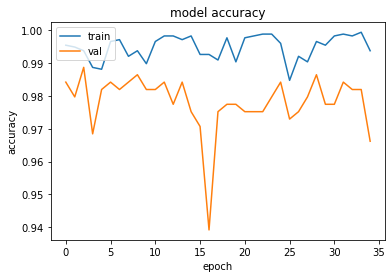

In [36]:
import keras
from matplotlib import pyplot as plt
#history = model.fit(X_train, y_train,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

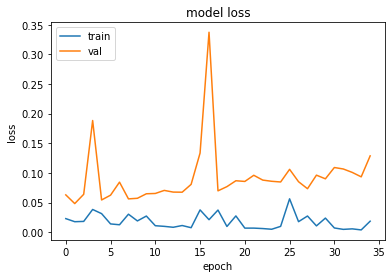

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()